#Libraries


In [0]:
import numpy as np 
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import *
from google.colab import drive

In [10]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [13]:
!ls "/content/drive/My Drive"

 asl-alphabet.zip     'HARSHIT MITTAL CV.docx'	  Pokemon_Dataset.zip
 CNNusingkeras.ipynb   num-sign-recognition.zip   Project_Model.ipynb
 data		       Pokemon_Classifier.ipynb   sign-language-mnist.zip
'Google Photos'        PokemonClassifier.ipynb	  Sign-Language-Recognition.zip


In [26]:
# Initializing the CNN
classifier = Sequential()

# First convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), input_shape=(64, 64, 1), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
# Second convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
classifier.add(Flatten())

# Adding a fully connected layer
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=6, activation='softmax')) # softmax for more than 2

classifier.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 62, 62, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 774       
Total para

In [0]:
# Compiling the CNN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # categorical_crossentropy for more than 2


In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)




In [29]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/data/train',
                                                 target_size=(64, 64),
                                                 batch_size=5,
                                                 color_mode='grayscale',
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('/content/drive/My Drive/data/test',
                                            target_size=(64, 64),
                                            batch_size=5,
                                            color_mode='grayscale',
                                            class_mode='categorical') 

Found 691 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


In [30]:
hist=classifier.fit_generator(
        training_set,
        steps_per_epoch=600, # No of images in training set
        epochs=10,
        validation_data=test_set,
        validation_steps=30)# No of images in test set


Epoch 1/10
600/600 [==============================] - 9s 15ms/step - loss: 0.7843 - acc: 0.6947 - val_loss: 0.3276 - val_acc: 0.8667
Epoch 2/10
600/600 [==============================] - 9s 15ms/step - loss: 0.2547 - acc: 0.9140 - val_loss: 0.5605 - val_acc: 0.8333
Epoch 3/10
600/600 [==============================] - 9s 15ms/step - loss: 0.1044 - acc: 0.9643 - val_loss: 0.4346 - val_acc: 0.9000
Epoch 4/10
600/600 [==============================] - 9s 15ms/step - loss: 0.0738 - acc: 0.9787 - val_loss: 0.2623 - val_acc: 0.9333
Epoch 5/10
600/600 [==============================] - 9s 15ms/step - loss: 0.0353 - acc: 0.9907 - val_loss: 0.4278 - val_acc: 0.8667
Epoch 6/10
600/600 [==============================] - 9s 15ms/step - loss: 0.0495 - acc: 0.9833 - val_loss: 0.4043 - val_acc: 0.9667
Epoch 7/10
600/600 [==============================] - 9s 15ms/step - loss: 0.0129 - acc: 0.9977 - val_loss: 0.4982 - val_acc: 0.9333
Epoch 8/10
600/600 [==============================] - 9s 15ms/step - 

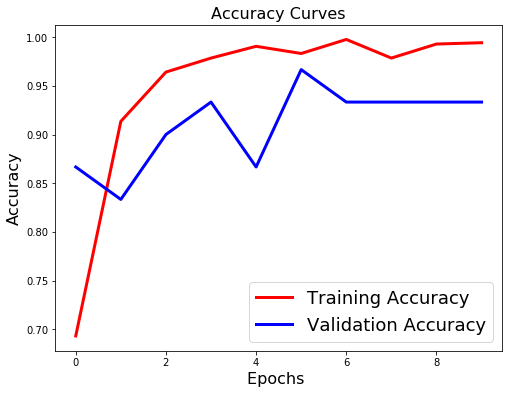

In [31]:
plt.figure(figsize=[8,6])
plt.plot(hist.history['acc'],'r',linewidth=3.0)
plt.plot(hist.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.show()

In [41]:
hist.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])